In [2]:
from ultralytics import YOLO
import random
import shutil
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<span style="font-size: 20px;"> Splitting the data : 


In [ ]:
import os
import random
import shutil

# Define paths
dataset_dir = "C:\Users\HP\Downloads\military\crop\split_dataset"
train_dir = "C:\Users\HP\Downloads\military\crop\split_dataset\test"
val_dir = "C:\Users\HP\Downloads\military\crop\split_dataset\train"
test_dir = "C:\Users\HP\Downloads\military\crop\split_dataset\val"

# Create directories if not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Define the percentage split
train_percent = 0.7
test_percent = 0.15
val_percent = 0.15

# Iterate over class folders
class_folders = os.listdir(data_dir)
for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        # Create class directories in train, test, and val folders
        os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_folder), exist_ok=True)

        # Get list of images in class folder
        images = os.listdir(class_path)
        num_images = len(images)

        # Shuffle images
        random.shuffle(images)

        # Calculate split indices
        num_train = round(num_images * train_percent)
        num_test = round(num_images * test_percent)
        num_val = num_images - num_train - num_test

        # Split images into train, test, and val sets
        train_images = images[:num_train]
        test_images = images[num_train:num_train + num_test]
        val_images = images[num_train + num_test:]

        # Copy images to respective directories
        for image in train_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(train_dir, class_folder, image)
            shutil.copy(src, dst)
        for image in test_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(test_dir, class_folder, image)
            shutil.copy(src, dst)
        for image in val_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(val_dir, class_folder, image)
            shutil.copy(src, dst)


<span style="font-size: 20px;">Classification Model : yolov8x-cls</span>


In [3]:
model = YOLO('yolov8x-cls.pt')  # load a pretrained model (recommended for training)

In [4]:
results = model.train(data=r"C:\Users\HP\Downloads\military\crop\data", epochs=25, imgsz=64,lr0=0.01,lrf=0.001)# Adjust the initial learning ratelrf: 


Ultralytics YOLOv8.1.42  Python-3.11.7 torch-2.2.2+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=C:\Users\HP\Downloads\military\crop\data, epochs=25, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train36, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

train: Scanning C:\Users\HP\Downloads\military\crop\data\train... 17869 images, 20 corrupt: 100%|██████████| 17869/17869 [00:00<?, ?it/s]

train: WARNING  C:\Users\HP\Downloads\military\crop\data\train\B1\3e8e9b33cae546f9cd705b04beb19b86_0.jpg: ignoring corrupt image/label: image size (9, 43) <10 pixels
train: WARNING  C:\Users\HP\Downloads\military\crop\data\train\B1\3e8e9b33cae546f9cd705b04beb19b86_1.jpg: ignoring corrupt image/label: image size (9, 44) <10 pixels
train: WARNING  C:\Users\HP\Downloads\military\crop\data\train\B1\3e8e9b33cae546f9cd705b04beb19b86_2.jpg: ignoring corrupt image/label: image size (9, 45) <10 pixels
train: WARNING  C:\Users\HP\Downloads\military\crop\data\train\B2\24ccde194acc7ed186a529293d7cbbff_0.jpg: ignoring corrupt image/label: image size (8, 44) <10 pixels
train: WARNING  C:\Users\HP\Downloads\military\crop\data\train\B2\815e60ecc084056ab212cb7e9fd0a8da_0.jpg: ignoring corrupt image/label: image size (6, 37) <10 pixels
train: WARNING  C:\Users\HP\Downloads\military\crop\data\train\B52\0c1f9a40df584f13cf3b71dcb0968ec2_10.jpg: ignoring corrupt image/label: image size (8, 62) <10 pixels
tr


val: Scanning C:\Users\HP\Downloads\military\crop\data\val... 2251 images, 5 corrupt: 100%|██████████| 2251/2251 [00:00<?, ?it/s]

val: WARNING  C:\Users\HP\Downloads\military\crop\data\val\B2\20119511433f4033037247136d240dbf_1.jpg: ignoring corrupt image/label: image size (9, 54) <10 pixels
val: WARNING  C:\Users\HP\Downloads\military\crop\data\val\B2\a07b28717e967e3aef1d9971871ae5e5_2.jpg: ignoring corrupt image/label: image size (9, 38) <10 pixels
val: WARNING  C:\Users\HP\Downloads\military\crop\data\val\F18\2957729725f0acb08acb86af5e28c5f3_0.jpg: ignoring corrupt image/label: image size (9, 20) <10 pixels
val: WARNING  C:\Users\HP\Downloads\military\crop\data\val\Rafale\9bf0ef742130d8324bc8894298af485a_0.jpg: ignoring corrupt image/label: image size (7, 13) <10 pixels
val: WARNING  C:\Users\HP\Downloads\military\crop\data\val\V22\a2eec38e660f689ae84071f85fd941a2_0.jpg: ignoring corrupt image/label: image size (9, 20) <10 pixels
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momen

TensorBoard: model graph visualization added 
Image sizes 64 train, 64 val
Using 0 dataloader workers
Logging results to runs\classify\train36
Starting training for 25 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [01:10<00:00,  1.01it/s]

                   all      0.349      0.655



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [00:58<00:00,  1.22it/s]

                   all      0.476      0.784



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [00:52<00:00,  1.35it/s]

                   all      0.518      0.815



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [00:53<00:00,  1.33it/s]

                   all      0.558      0.828



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [01:00<00:00,  1.18it/s]

                   all      0.622      0.858



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [00:56<00:00,  1.27it/s]

                   all      0.647      0.878



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [00:55<00:00,  1.29it/s]

                   all      0.656      0.887



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [11:36<00:00,  9.81s/it]   

                   all      0.689      0.896



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [02:52<00:00,  2.43s/it]

                   all      0.694      0.897



      Epoch    GPU_mem       loss  Instances       Size


      10/25         0G     0.9409         13         64: 100%|██████████| 1117/1117 [55:42<00:00,  2.99s/it] 
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [01:25<00:00,  1.20s/it]

                   all      0.721      0.908



      Epoch    GPU_mem       loss  Instances       Size


      11/25         0G     0.8679         13         64: 100%|██████████| 1117/1117 [26:48<00:00,  1.44s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [01:12<00:00,  1.02s/it]

                   all      0.737       0.92



      Epoch    GPU_mem       loss  Instances       Size


      12/25         0G     0.7793         13         64: 100%|██████████| 1117/1117 [23:22<00:00,  1.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [00:55<00:00,  1.29it/s]

                   all      0.737       0.91



      Epoch    GPU_mem       loss  Instances       Size


      13/25         0G     0.7024         13         64: 100%|██████████| 1117/1117 [22:30<00:00,  1.21s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [00:55<00:00,  1.29it/s]

                   all      0.754      0.912



      Epoch    GPU_mem       loss  Instances       Size


      14/25         0G     0.6425         13         64: 100%|██████████| 1117/1117 [24:23<00:00,  1.31s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [01:12<00:00,  1.02s/it]

                   all      0.739      0.915



      Epoch    GPU_mem       loss  Instances       Size


      15/25         0G     0.5961         13         64: 100%|██████████| 1117/1117 [22:51<00:00,  1.23s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [00:54<00:00,  1.30it/s]

                   all       0.75      0.909



      Epoch    GPU_mem       loss  Instances       Size


      16/25         0G     0.5365         13         64: 100%|██████████| 1117/1117 [22:54<00:00,  1.23s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [00:53<00:00,  1.32it/s]

                   all      0.766       0.92



      Epoch    GPU_mem       loss  Instances       Size


      17/25         0G     0.5045         13         64: 100%|██████████| 1117/1117 [22:20<00:00,  1.20s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [01:01<00:00,  1.16it/s]

                   all      0.773      0.918



      Epoch    GPU_mem       loss  Instances       Size


      18/25         0G     0.4631         13         64: 100%|██████████| 1117/1117 [46:53<00:00,  2.52s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [02:31<00:00,  2.13s/it]

                   all       0.77      0.926



      Epoch    GPU_mem       loss  Instances       Size


      19/25         0G     0.4247         13         64: 100%|██████████| 1117/1117 [55:12<00:00,  2.97s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [02:30<00:00,  2.12s/it]

                   all      0.775      0.919



      Epoch    GPU_mem       loss  Instances       Size


      20/25         0G     0.3852         13         64: 100%|██████████| 1117/1117 [31:17<00:00,  1.68s/it] 
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [01:06<00:00,  1.07it/s]

                   all      0.786      0.922



      Epoch    GPU_mem       loss  Instances       Size


      21/25         0G     0.3549         13         64: 100%|██████████| 1117/1117 [25:48<00:00,  1.39s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [01:03<00:00,  1.11it/s]

                   all      0.795      0.924



      Epoch    GPU_mem       loss  Instances       Size


      22/25         0G     0.3303         13         64: 100%|██████████| 1117/1117 [26:22<00:00,  1.42s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [01:04<00:00,  1.11it/s]

                   all      0.795      0.925



      Epoch    GPU_mem       loss  Instances       Size


      23/25         0G     0.3064         13         64: 100%|██████████| 1117/1117 [43:52<00:00,  2.36s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [02:30<00:00,  2.12s/it]

                   all      0.796      0.924



      Epoch    GPU_mem       loss  Instances       Size


      24/25         0G     0.2787         13         64: 100%|██████████| 1117/1117 [56:55<00:00,  3.06s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [02:28<00:00,  2.10s/it]

                   all        0.8      0.926



      Epoch    GPU_mem       loss  Instances       Size


      25/25         0G     0.2527         13         64: 100%|██████████| 1117/1117 [51:04<00:00,  2.74s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [02:08<00:00,  1.81s/it]

                   all      0.801      0.927



25 epochs completed in 15.319 hours.
Optimizer stripped from runs\classify\train36\weights\last.pt, 112.6MB
Optimizer stripped from runs\classify\train36\weights\best.pt, 112.6MB

Validating runs\classify\train36\weights\best.pt...
Ultralytics YOLOv8.1.42  Python-3.11.7 torch-2.2.2+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLOv8x-cls summary (fused): 133 layers, 56183407 parameters, 0 gradients, 153.8 GFLOPs
train: C:\Users\HP\Downloads\military\crop\data\train... found 17889 images in 47 classes  
val: C:\Users\HP\Downloads\military\crop\data\val... found 2256 images in 47 classes  
test: C:\Users\HP\Downloads\military\crop\data\test... found 2192 images in 47 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 71/71 [02:02<00:00,  1.72s/it]


                   all      0.802      0.926
Speed: 0.0ms preprocess, 29.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train36
Results saved to runs\classify\train36


<span style="font-size: 20px;">Model evaluation </span>


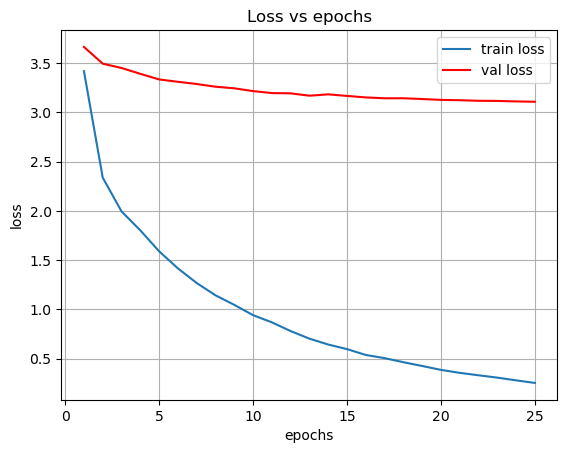

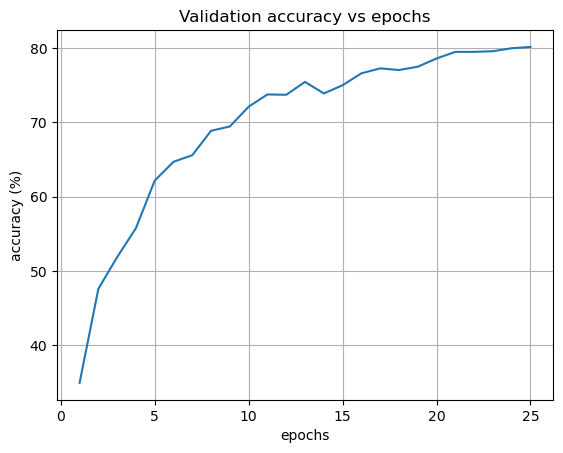

In [10]:
# Assuming 'results.csv' is in the same directory as this script
results_path = r"C:\Users\HP\Downloads\runs\classify\train36\results.csv"

# Read the CSV file
results = pd.read_csv(r"C:\Users\HP\Downloads\runs\classify\train36\results.csv")

# Plot loss vs epochs
plt.figure()
plt.plot(results['epoch'], results[' train/loss'], label='train loss')
plt.plot(results['epoch'], results['val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

# Plot validation accuracy vs epochs
plt.figure()
plt.plot(results['epoch'], results['metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()


In [12]:
model = YOLO(r"C:\Users\HP\Downloads\runs\classify\train36\weights\last.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.1.42  Python-3.11.7 torch-2.2.2+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLOv8x-cls summary (fused): 133 layers, 56183407 parameters, 0 gradients, 153.8 GFLOPs
train: C:\Users\HP\Downloads\military\crop\data\train... found 17889 images in 47 classes  
val: C:\Users\HP\Downloads\military\crop\data\val... found 2256 images in 47 classes  
test: C:\Users\HP\Downloads\military\crop\data\test... found 2192 images in 47 classes  


val: Scanning C:\Users\HP\Downloads\military\crop\data\val... 2251 images, 5 corrupt: 100%|██████████| 2251/2251 [00:00<?, ?it/s]

val: WARNING  C:\Users\HP\Downloads\military\crop\data\val\B2\20119511433f4033037247136d240dbf_1.jpg: ignoring corrupt image/label: image size (9, 54) <10 pixels
val: WARNING  C:\Users\HP\Downloads\military\crop\data\val\B2\a07b28717e967e3aef1d9971871ae5e5_2.jpg: ignoring corrupt image/label: image size (9, 38) <10 pixels
val: WARNING  C:\Users\HP\Downloads\military\crop\data\val\F18\2957729725f0acb08acb86af5e28c5f3_0.jpg: ignoring corrupt image/label: image size (9, 20) <10 pixels
val: WARNING  C:\Users\HP\Downloads\military\crop\data\val\Rafale\9bf0ef742130d8324bc8894298af485a_0.jpg: ignoring corrupt image/label: image size (7, 13) <10 pixels
val: WARNING  C:\Users\HP\Downloads\military\crop\data\val\V22\a2eec38e660f689ae84071f85fd941a2_0.jpg: ignoring corrupt image/label: image size (9, 20) <10 pixels



               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [01:59<00:00,  1.18it/s]


                   all      0.802      0.926
Speed: 0.0ms preprocess, 22.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\val7


0.9258107542991638

 <span style="font-size: 20px;">Using the model for prediction</span>


In [14]:
model = YOLO(r"C:\Users\HP\Downloads\runs\classify\train36\weights\last.pt")  # load a custom model

results = model(r"C:\Users\HP\Downloads\be200.jpg")  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
confidence = np.argmax(probs)
print(probs)

print(names_dict[confidence])
print(confidence,"%")


image 1/1 C:\Users\HP\Downloads\be200.jpg: 64x64 Be200 0.97, AG600 0.01, RQ4 0.00, C2 0.00, F18 0.00, 88.8ms
Speed: 5.0ms preprocess, 88.8ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)
{0: 'A10', 1: 'A400M', 2: 'AG600', 3: 'AV8B', 4: 'B1', 5: 'B2', 6: 'B52', 7: 'Be200', 8: 'C130', 9: 'C17', 10: 'C2', 11: 'C5', 12: 'E2', 13: 'E7', 14: 'EF2000', 15: 'F117', 16: 'F14', 17: 'F15', 18: 'F16', 19: 'F18', 20: 'F22', 21: 'F35', 22: 'F4', 23: 'J10', 24: 'J20', 25: 'JAS39', 26: 'KC135', 27: 'MQ9', 28: 'Mig31', 29: 'Mirage2000', 30: 'P3', 31: 'RQ4', 32: 'Rafale', 33: 'SR71', 34: 'Su24', 35: 'Su25', 36: 'Su34', 37: 'Su57', 38: 'Tornado', 39: 'Tu160', 40: 'Tu95', 41: 'U2', 42: 'US2', 43: 'V22', 44: 'Vulcan', 45: 'XB70', 46: 'YF23'}
[2.289739677507896e-05, 5.939741640759166e-06, 0.01365242712199688, 6.819029658799991e-05, 5.449220225273166e-06, 0.00033883965807035565, 8.447499567409977e-05, 0.9707531332969666, 0.00010147049033548683, 9.012045484269038e-05, 0.0022499312181025743, 

In [2]:
# Load the image (replace with your actual image path)
img = cv2.imread(r"C:\Users\HP\Downloads\be200.jpg")

# Check if image loading was successful
if img is None:
    print("Error: Could not read image!")
    exit()

# Load your custom classification YOLO model (replace with your model path)
model = YOLO("C:/Users/HP/Downloads/runs/classify/train36/weights/last.pt")

# Make predictions on the image
results = model(img)

# Assuming results is a list containing a single detection (classification)
if len(results) != 1:
    print("Warning: Unexpected number of detections in results. Only processing the first one.")

# Extract predicted class name and confidence from the first detection
names_dict = results[0].names
probs = results[0].probs.data.tolist()
 # Assuming names attribute contains class names
predicted_class_name = names_dict[np.argmax(probs)]
confidence = np.argmax(probs)  # Assuming conf attribute contains confidence score

# Display predicted class and confidence score (modify placement as needed)
text = f"Predicted Class: {predicted_class_name} - Confidence: {confidence:.2f}%"
cv2.putText(img, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Display the image with prediction
cv2.imshow("Image with Prediction", img)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()



0: 64x64 Be200 0.97, AG600 0.01, RQ4 0.00, C2 0.00, F18 0.00, 74.9ms
Speed: 18.9ms preprocess, 74.9ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)
